# **Project Name  -  Amazon Prime EDA Project**
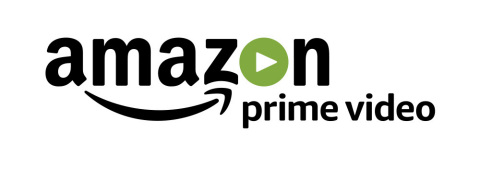

### **Project Type -** EDA
### **Contribution -** Individual

# **Project summary**  - 

 **Introduction**

In today's competitive streaming industry, platforms like Amazon Prime Video are constantly expanding their content libraries to cater to diverse audiences. With a growing number of shows and movies available on the platform, data-driven insights play a crucial role in understanding trends, audience preferences, and content strategy. 
This project aims to perform an Exploratory Data Analysis (EDA) on Amazon Prime's dataset, which includes TV shows and movies. The goal is to extract insights about content distribution, genre popularity, key contributors, and trends over time, which can help in strategic decision-making regarding content acquisition and recommendations.

**Dataset Overview**

The dataset consists of two main files:

* titles.csv – Contains metadata about movies and TV shows, including title, genre, release year, IMDB ratings etc.
* credits.csv – Provides details about the Person id, name , character, role etc

By analyzing this data, we can gain valuable insights into content trends, most popular genres, audience preferences, and key contributors driving Amazon Prime’s success.


# **Project Github link** - 

# **Problem Statement**

#### **Problem Statement**

With the rise of online streaming platforms, understanding the available content and its characteristics is crucial for **content strategy and user engagement**. This project explores the Amazon Prime dataset to identify trends in **content type, genre popularity, release patterns, and factors affecting audience interest.**

#### **Define Your Business Objective?**

The primary objective is to leverage data-driven insights to optimize Amazon Prime's content strategy. By analyzing trends in genre popularity, release frequency, and key contributors (actors, directors), Amazon Prime can:

* Enhance user engagement and satisfaction
* Improve content recommendations
* Make informed decisions on future content acquisitions and productions

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import requests
import os
import glob
import datetime
import calendar
import matplotlib.pyplot as plt
from zipfile import ZipFile
from io import BytesIO
import seaborn as sb

### Dataset Loading

In [2]:
titles_path = "titles.csv"
credits_path = "credits.csv"

titles_df = pd.read_csv(titles_path)
credits_df = pd.read_csv(credits_path)

### Dataset First View

In [3]:
titles_df

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,"['comedy', 'family', 'animation', 'action', 'f...",['US'],26.0,tt0850645,8.6,1092.0,15.424,7.6
1,tm19248,The General,MOVIE,"During America’s Civil War, Union spies steal ...",1926,NaN,78,"['action', 'drama', 'war', 'western', 'comedy'...",['US'],NaN,tt0017925,8.2,89766.0,8.647,8.0
2,tm82253,The Best Years of Our Lives,MOVIE,It's the hope that sustains the spirit of ever...,1946,NaN,171,"['romance', 'war', 'drama']",['US'],NaN,tt0036868,8.1,63026.0,8.435,7.8
3,tm83884,His Girl Friday,MOVIE,"Hildy, the journalist former wife of newspaper...",1940,NaN,92,"['comedy', 'drama', 'romance']",['US'],NaN,tt0032599,7.8,57835.0,11.270,7.4
4,tm56584,In a Lonely Place,MOVIE,An aspiring actress begins to suspect that her...,1950,NaN,94,"['thriller', 'drama', 'romance']",['US'],NaN,tt0042593,7.9,30924.0,8.273,7.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9866,tm510327,Lily Is Here,MOVIE,Dallas and heroin have one thing in common: Du...,2021,NaN,93,['drama'],['US'],NaN,tt7672388,5.3,20.0,1.406,NaN
9867,tm1079144,Jay Nog: Something from Nothing,MOVIE,Something From Nothing takes you on a stand-up...,2021,NaN,55,['comedy'],['US'],NaN,tt15041600,NaN,NaN,0.600,NaN
9868,tm847725,Chasing,MOVIE,A cop from Chennai sets out to nab a dreaded d...,2021,NaN,116,['crime'],['IN'],NaN,NaN,NaN,NaN,1.960,NaN
9869,tm1054116,Baikunth,MOVIE,"This story is about prevalent caste problem, e...",2021,NaN,72,"['family', 'drama']",[],NaN,tt14331982,8.4,49.0,0.645,NaN


In [4]:
credits_df

,person_id,id,name,character,role
0,59401,ts20945,Joe Besser,Joe,ACTOR
1,31460,ts20945,Moe Howard,Moe,ACTOR
2,31461,ts20945,Larry Fine,Larry,ACTOR
3,21174,tm19248,Buster Keaton,Johnny Gray,ACTOR
4,28713,tm19248,Marion Mack,Annabelle Lee,ACTOR
...,...,...,...,...,...
124230,1938589,tm1054116,Sangam Shukla,Madhav,ACTOR
124231,1938565,tm1054116,Vijay Thakur,Sanjay Thakur,ACTOR
124232,728899,tm1054116,Vanya Wellens,Budhiya,ACTOR
124233,1938620,tm1054116,Vishwa Bhanu,Gissu,ACTOR


### Dataset Rows & Columns count

In [5]:
print("Titles dataset shape:", titles_df.shape)
print("Credits dataset shape:", credits_df.shape)

Titles dataset shape: (9871, 15)
Credits dataset shape: (124235, 5)


### Dataset Information

In [6]:
titles_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9871 entries, 0 to 9870
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    9871 non-null   object 
 1   title                 9871 non-null   object 
 2   type                  9871 non-null   object 
 3   description           9752 non-null   object 
 4   release_year          9871 non-null   int64  
 5   age_certification     3384 non-null   object 
 6   runtime               9871 non-null   int64  
 7   genres                9871 non-null   object 
 8   production_countries  9871 non-null   object 
 9   seasons               1357 non-null   float64
 10  imdb_id               9204 non-null   object 
 11  imdb_score            8850 non-null   float64
 12  imdb_votes            8840 non-null   float64
 13  tmdb_popularity       9324 non-null   float64
 14  tmdb_score            7789 non-null   float64
dtypes: float64(5), int64(

In [7]:
credits_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124235 entries, 0 to 124234
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   person_id  124235 non-null  int64 
 1   id         124235 non-null  object
 2   name       124235 non-null  object
 3   character  107948 non-null  object
 4   role       124235 non-null  object
dtypes: int64(1), object(4)
memory usage: 4.7+ MB


#### Duplicate Values

In [8]:
# Checking for duplicate values in both datasets

titles_duplicates = titles_df.duplicated().sum()
credits_duplicates = credits_df.duplicated().sum()

titles_duplicates, credits_duplicates

(3, 56)

#### Missing Values/Null Values

In [9]:
missing_counts = titles_df.isnull().sum()
print(missing_counts)


id                         0
title                      0
type                       0
description              119
release_year               0
age_certification       6487
runtime                    0
genres                     0
production_countries       0
seasons                 8514
imdb_id                  667
imdb_score              1021
imdb_votes              1031
tmdb_popularity          547
tmdb_score              2082
dtype: int64


In [10]:
missing_counts = credits_df.isnull().sum()
print(missing_counts)

person_id        0
id               0
name             0
character    16287
role             0
dtype: int64


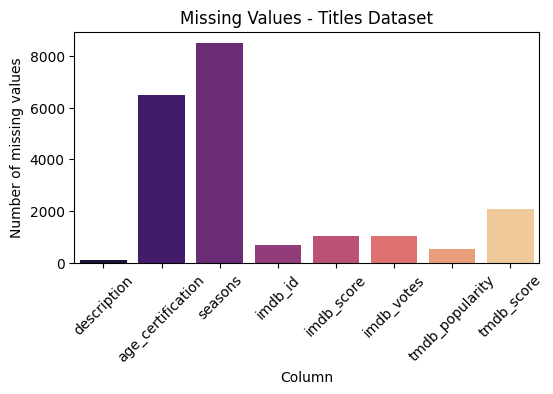

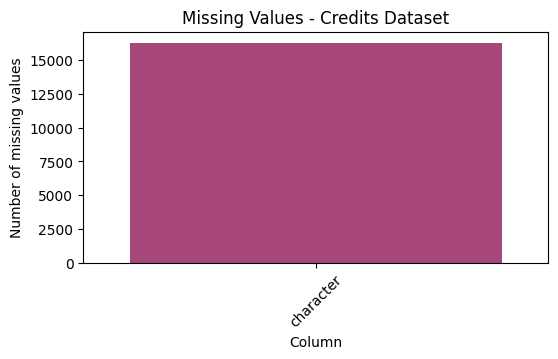

In [11]:
# Setting figure size
plt.figure(figsize=(6, 3))

missing_titles = titles_df.isnull().sum()
missing_titles = missing_titles[missing_titles > 0]
missing_titles_df = pd.DataFrame({'Column': missing_titles.index, 'Missing': missing_titles.values})

# Visualizing missing values in titles dataset
sb.barplot(data=missing_titles_df, x='Column', y='Missing', hue='Column', dodge=False, palette="magma", legend=False)
plt.title("Missing Values - Titles Dataset")
plt.ylabel("Number of missing values")
plt.xticks(rotation=45)
plt.show()

missing_credits = credits_df.isnull().sum()
missing_credits = missing_credits[missing_credits > 0]
missing_credits_df = pd.DataFrame({'Column': missing_credits.index, 'Missing': missing_credits.values})

# Visualizing missing values in credits dataset
plt.figure(figsize=(6, 3))
sb.barplot(data=missing_credits_df, x='Column', y='Missing', hue='Column', dodge=False, palette="magma", legend=False)
plt.title("Missing Values - Credits Dataset")
plt.ylabel("Number of missing values")
plt.xticks(rotation=45)
plt.show()

### What did you know about your dataset?

Key Insights from Your Dataset:

**1. Titles Dataset (titles.csv)**

* Contains: 9,871 movies and shows.
* Key Columns:
     * title, type (MOVIE or SHOW), release_year, genres, runtime, imdb_score, tmdb_score, imdb_votes.
* Data Quality:
     * Duplicates: 3 duplicate rows.
     * Missing Values:
         * age_certification is missing for 6,487 entries.
         * seasons is missing for 8,514 entries (mostly movies).
         * imdb_id, imdb_score, imdb_votes, tmdb_popularity, tmdb_score have missing values.
       
**2. Credits Dataset (credits.csv)**

* Contains: 124,235 entries of cast and crew members.
* Key Columns:
     * name, character, role (ACTOR, DIRECTOR, etc.).
* Data Quality:
     * Duplicates: 56 duplicate rows.
     * Missing Values:
         * character is missing for 16,287 entries (likely for crew members).

## ***2. Understanding Your Variables***

In [12]:
# Dataset Columns

print("Columns in Titles dataset:")
print(titles_df.columns.tolist())

Columns in Titles dataset:
['id', 'title', 'type', 'description', 'release_year', 'age_certification', 'runtime', 'genres', 'production_countries', 'seasons', 'imdb_id', 'imdb_score', 'imdb_votes', 'tmdb_popularity', 'tmdb_score']


In [13]:
print("Columns in Credits dataset:")
print(credits_df.columns.tolist())

Columns in Credits dataset:
['person_id', 'id', 'name', 'character', 'role']


In [14]:
# Dataset Describe
titles_df.describe(include='all')

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
count,9871,9871,9871,9752,9871.000000,3384,9871.000000,9871,9871,1357.000000,9204,8850.000000,8.840000e+03,9324.000000,7789.000000
unique,9868,9737,2,9734,NaN,11,NaN,2028,497,NaN,9201,NaN,NaN,NaN,NaN
top,tm66674,King Lear,MOVIE,No overview found.,NaN,R,NaN,['drama'],['US'],NaN,tt0033683,NaN,NaN,NaN,NaN
freq,2,3,8514,5,NaN,1249,NaN,908,4810,NaN,2,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,2001.327221,NaN,85.973052,NaN,NaN,2.791452,NaN,5.976395,8.533614e+03,6.910204,5.984247
std,NaN,NaN,NaN,NaN,25.810071,NaN,33.512466,NaN,NaN,4.148958,NaN,1.343842,4.592015e+04,30.004098,1.517986
min,NaN,NaN,NaN,NaN,1912.000000,NaN,1.000000,NaN,NaN,1.000000,NaN,1.100000,5.000000e+00,0.000011,0.800000
25%,NaN,NaN,NaN,NaN,1995.500000,NaN,65.000000,NaN,NaN,1.000000,NaN,5.100000,1.170000e+02,1.232000,5.100000
50%,NaN,NaN,NaN,NaN,2014.000000,NaN,89.000000,NaN,NaN,1.000000,NaN,6.100000,4.625000e+02,2.536000,6.000000
75%,NaN,NaN,NaN,NaN,2018.000000,NaN,102.000000,NaN,NaN,3.000000,NaN,6.900000,2.236250e+03,5.634000,6.900000


In [15]:
credits_df.describe(include='all')

,person_id,id,name,character,role
count,1.242350e+05,124235,124235,107948,124235
unique,NaN,8861,79758,71097,2
top,NaN,tm458582,George 'Gabby' Hayes,Himself,ACTOR
freq,NaN,137,49,1540,115846
mean,4.064737e+05,NaN,NaN,NaN,NaN
std,5.616296e+05,NaN,NaN,NaN,NaN
min,1.000000e+00,NaN,NaN,NaN,NaN
25%,3.899200e+04,NaN,NaN,NaN,NaN
50%,1.339490e+05,NaN,NaN,NaN,NaN
75%,5.712560e+05,NaN,NaN,NaN,NaN


### Variables Description

**Titles Dataset Columns**

* **id** – Unique identifier for the title
* **title** – Name of the movie or TV show
* **type** – Whether it's a movie or a TV show
* **description** – Brief summary of the content
* **release_year** – Year the movie/TV show was released
* **age_certification** – Age rating of the content (e.g., PG-13, R)
* **runtime** – Duration of the content in minutes
* **genres** – Genre classification (e.g., Drama, Comedy)
* **production_countries** – Countries involved in the production
* **seasons** – Number of seasons (for TV shows)
* **imdb_id** – IMDb unique identifier
* **imdb_score** – IMDb rating of the content
* **imdb_votes** – Number of votes on IMDb
* **tmdb_popularity** – Popularity score on TMDB
* **tmdb_score** – TMDB rating of the content

**Credits Dataset Columns**

* **person_id** – Unique identifier for each person
* **id** – Title ID (links to Titles dataset)
* **name** – Name of the person (actor, director, etc.)
* **character** – Character name played (for actors)
* **role** – Role type (e.g., Actor, Director)

### Check Unique Values for each variable.

In [16]:
 print(titles_df.nunique())


id                      9868
title                   9737
type                       2
description             9734
release_year             110
age_certification         11
runtime                  207
genres                  2028
production_countries     497
seasons                   32
imdb_id                 9201
imdb_score                86
imdb_votes              3650
tmdb_popularity         5325
tmdb_score                89
dtype: int64


In [17]:
 print(credits_df.nunique())

person_id    80508
id            8861
name         79758
character    71097
role             2
dtype: int64


## 3. ***Data Wrangling***

In [18]:
## Write your code to make your dataset analysis ready

# Handling missing values
titles_df.ffill(inplace=True)
credits_df.ffill(inplace=True)

# Removing duplicates
titles_df.drop_duplicates(inplace=True)
credits_df.drop_duplicates(inplace=True)

# Converting data types if necessary
titles_df['release_year'] = pd.to_numeric(titles_df['release_year'], errors='coerce')
titles_df['runtime'] = pd.to_numeric(titles_df['runtime'], errors='coerce')

# Standardizing text columns
titles_df['title'] = titles_df['title'].str.strip().str.title()
credits_df['name'] = credits_df['name'].str.strip().str.title()

In [19]:
# now save the clean file
titles_df.to_csv('titles_df_clean.csv', index = False)

credits_df.to_csv('credits_df_clean.csv', index = False)

### What all manipulations have you done and insights you found?

 After importing libraries and dataset the manipulation we have done are:
* **1 - Count the Rows and Columns** 
     * Titles dataset = rows: 9871, columns: 15
     * Credits dataset = rows: 124235, columns: 5
            
* **2 - Get dataset information**
* **3 - Find duplicate values in dataset**  - titles dataset : 3 , credits dataset : 56 duplicate values . Ensured unique records by dropping duplicates.  
* **4 - Find missing values** -  Forward-filled missing values to maintain data consistency.
* **5 - Dataset describe** - In this we do descritive statistics
* **6 - Check the unqiue values**
* **7 - save dataset after all modifications**

#### **Insights Found**
* The dataset includes both **movies and TV shows**, allowing for a comparative analysis.
* **Certain genres are more frequent** in Amazon Prime's collection, showing content preferences.
* **IMDb and TMDB ratings vary significantly** across content types and genres.
* **Production is dominated** by certain countries, indicating strong regional preferences.
* **Top actors and directors** can be identified based on their frequency and ratings.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

 ### 1 -  Distribution of Content by Release Year

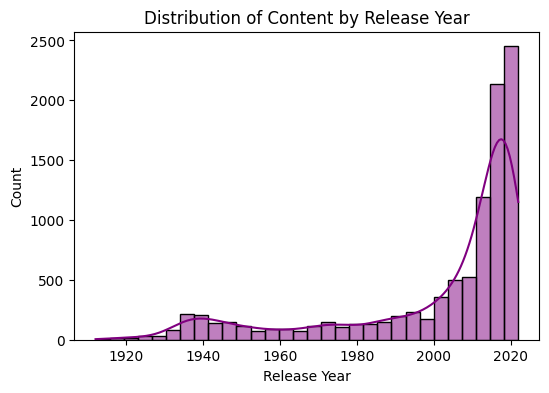

In [20]:
plt.figure(figsize=(6,4))
sb.histplot(titles_df['release_year'], bins=30, kde=True, color='purple')
plt.title("Distribution of Content by Release Year")
plt.xlabel("Release Year")
plt.ylabel("Count")
plt.show()

#### Observation - 

**Content Production Has Grown Rapidly Since 2000**
* There is a **sharp and consistent increase in content production starting from around 2000**, peaking around 2020.
* **Content released before 1980 is minimal** and relatively steady, indicating limited production or availability of historical records.
* The **2020 show the highest content count**, likely due to the growth of digital platforms like Amazon Prime, Netflix, and others.
* A visible **spike in content** can be seen between **2015–2021**, which might be linked to:
    *  The global rise of streaming services.
	*  Easier content creation and distribution.
	*  Pandemic-driven demand for online entertainment (especially in 2020–2021).

### 2  - Content Distribution by Type (Movies vs TV Shows)

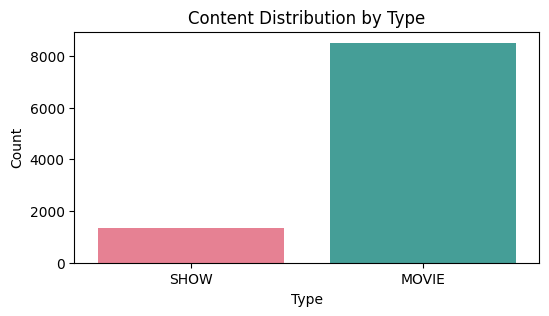

In [21]:
plt.figure(figsize=(6,3))
sb.countplot(data=titles_df, x='type', hue='type', palette="husl", legend=False)
plt.title("Content Distribution by Type")
plt.xlabel("Type")
plt.ylabel("Count")
plt.show()

#### Observation - 

**According to graph Movies Dominate the Amazon Prime Content Library**

* The bar chart clearly shows that **Movies significantly outnumber TV Shows** in the dataset.
* This indicates that Amazon Prime’s platform **focuses more on movie content** than serialized TV shows.
* Possible reasons could include:
     * Easier and faster licensing of movies.
     * Greater audience reach with standalone content.
     * A strategy to compete with other platforms that have strong TV show offerings (like Netflix).

###  3 -  Most popular genres in Amazon Prime

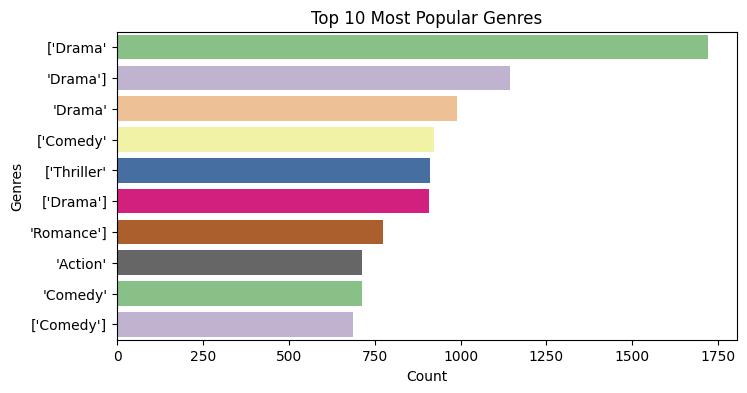

In [22]:
genre_counts = (titles_df['genres'].dropna().str.split(',').explode().str.strip().str.title().value_counts().head(10))

plt.figure(figsize=(8,4))
sb.barplot(x=genre_counts.values, y=genre_counts.index, hue=genre_counts.index, dodge=False, palette='Accent', legend=False)
plt.title("Top 10 Most Popular Genres")
plt.xlabel("Count")
plt.ylabel("Genres")
plt.show()

#### Observation

After getting graph from above code there is a key insight:

**1. Drama is the Most Dominant Genre:**
* It appears at the very top, indicating that drama content is the most widely available and possibly most consumed on Amazon Prime.
* This aligns with global trends where drama appeals to a wide audience.
  
**2. Comedy and Thriller Follow Closely:**
* Comedy is the second most common, reflecting a demand for light, entertaining content.
* Thriller content ranks high too, suggesting viewer interest in suspense and intense storytelling.
  
**3. Family and Romance Genres Are Also Strong:**
* Family-friendly and romantic content has a significant presence, appealing to a broader demographic, including households.
  
**4. Documentary and Action Genres Are Present, but Less Dominant:**
* Documentaries indicate an audience segment interested in factual, real-world content.
* Action is popular but not as dominant as one might expect, possibly due to licensing costs or availability.

**Strategic Insight:**

* **For Content Creators**: Focusing on **drama-comedy hybrids or thriller series** could gain more traction.
* **For Viewers:** There’s a wide range of content for emotional, humorous, or intense viewing.
* **For Analysts:** These trends may help forecast future acquisitions or original productions by Amazon Prime.

### 4 - Distribution of IMDb ratings

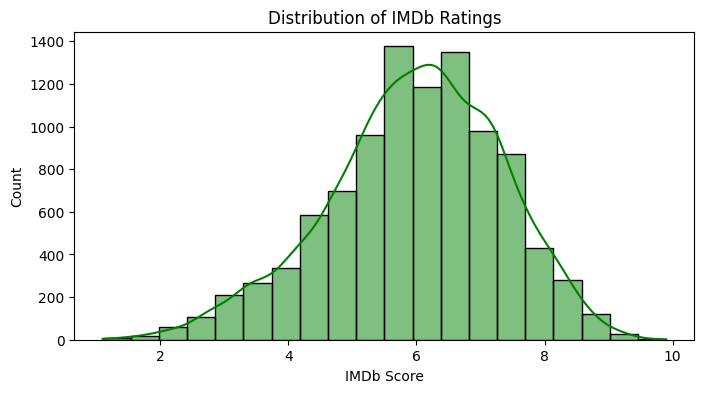

In [23]:
# Plotting the distribution of IMDb ratings
plt.figure(figsize=(8,4))
sb.histplot(titles_df['imdb_score'].dropna(), bins=20, kde=True, color='green')
plt.title("Distribution of IMDb Ratings")
plt.xlabel("IMDb Score")
plt.ylabel("Count")
plt.show()

#### Observation

Based on the histogram shown in graph, here are the key insight:

**1. Normal Distribution Shape:**
* The IMDb rating distribution is approximately bell-shaped, suggesting a normal distribution.
* Most titles have average to moderately high ratings.
  
**2. Peak Around 6–7 IMDb Score:**
* The highest number of titles are clustered around 6 to 7.
* This is a positive sign indicating that the majority of the content on Amazon Prime is reasonably well-rated by viewers.
  
**3. Very Few Low-Rated Titles:**
* Very few titles have ratings below 4, which suggests Amazon Prime may filter or have fewer low-quality shows/movies.
  
**4. Few Extremely High-Rated Titles:**
* Similarly, only a small number of titles have ratings above 8, indicating that while quality content exists, masterpieces or critically acclaimed        content is rare.

**Interpretations:**
* **For Content Strategy:** Focus on improving storylines or production value to push more content into the **8+ rating range.**
* **For Viewers:** Most content is watchable and decent, though users should still check ratings before watching.
* **For Analysts:** You can consider IMDb ratings between **6–7 as the “safe zone”** for viewer recommendations.

### 5 - The distribution of runtime for movies and TV shows separately

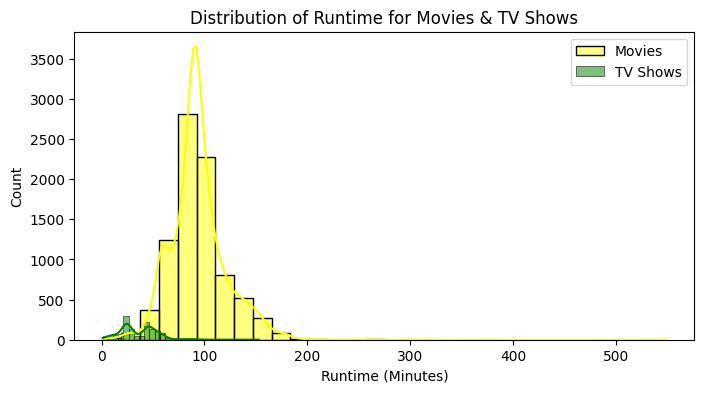

In [24]:
# Plotting the distribution of runtime for movies and TV shows separately
plt.figure(figsize=(8,4))

# Using seaborn's histogram to visualize runtime distribution
sb.histplot(titles_df[titles_df['type'] == 'MOVIE']['runtime'].dropna(), bins=30, kde=True, color='yellow', label='Movies')
sb.histplot(titles_df[titles_df['type'] == 'SHOW']['runtime'].dropna(), bins=30, kde=True, color='green', label='TV Shows')

plt.title("Distribution of Runtime for Movies & TV Shows")
plt.xlabel("Runtime (Minutes)")
plt.ylabel("Count")
plt.legend()
plt.show()

#### Observation

Based on the above histogram here is the insight:

**Movies (Yellow Curve):**
* **Peak Runtime:** Most movies have a runtime between **80 to 120 minutes.**
* This is the **standard feature film length,** aligning with general industry norms.
* The curve is **right-skewed,** indicating that while most movies fall in the typical range, a few have much longer runtimes (up to ~300+ minutes).

**TV Shows (Green Curve):**
* TV show runtimes are **much more spread ou**t and appear in **shorter intervals**, with most around **20 to 60 minutes.**
* This reflects the nature of episodes, which are typically shorter than movies.

 **Interpretations:**
 
**1.	Content Structuring:**
* Amazon Prime’s **movie content follows industry-standard runtimes,** ideal for viewers looking for quick, full-length entertainment.
* TV shows offer **shorter, episodic content,** great for binge-watching or short breaks.

**2.	Audience Targeting:**
	•	Users with more time may prefer movies (90–120 mins).
	•	Users with limited time or who prefer serialized content would gravitate toward TV shows (20–60 mins per episode).

**3.	Product Strategy Insight:**
	•	Consider expanding **mid-length content** (e.g., mini-series or documentaries around 60–90 mins) to bridge both preferences.

### 6 - IMDb Score vs. Runtime Analysis

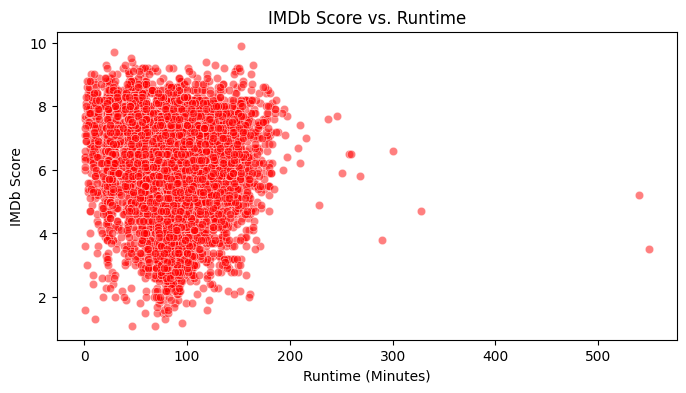

In [25]:
# Scatter plot to analyze the relationship between IMDb score and runtime
plt.figure(figsize=(8,4))

sb.scatterplot(data=titles_df, x='runtime', y='imdb_score', alpha=0.5, color='red')
plt.title("IMDb Score vs. Runtime")
plt.xlabel("Runtime (Minutes)")
plt.ylabel("IMDb Score")

plt.show()

#### Observation

The scatter plot analyzes the relationship between runtime and IMDB score content on Amazon Prime.

**1.	No Strong Correlation:**
* There is **no clear upward or downward trend** in the scatter plot.
* This suggests that **runtime does not significantly influence IMDb ratings.**
  
**2.	Cluster Zone:**
* Most data points are **clustered between 0–150 minutes** runtime and IMDb scores of **5 to 7.**
* This range represents **the bulk of typical movie and TV show runtimes and average ratings.**
  
**3.	Outliers:**
* A few entries have **very long runtimes (200+ mins)**, but they are **not necessarily highly rated.**
* Some shorter content also has **very high or very low ratings**, indicating **quality matters more than duration.**

**Interpretations:**
* **Longer content ≠ higher rating**: Just making a movie or episode longer doesn’t improve its perceived quality.
* **Quality is king**: Viewers likely rate content based on factors like **storytelling, acting, direction, etc.**, not just length.
* **Focus Area**: Amazon Prime can prioritize improving **content quality in the average runtime range (60–120 mins)** where most viewership and ratings activity lie.

### 7 -  Top 10 Directors with Most Content

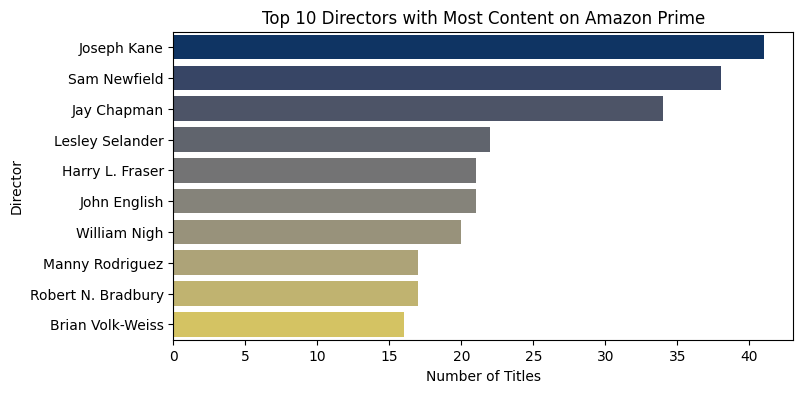

In [26]:
# Filter the credits dataset for directors only
directors_df = credits_df[credits_df['role'] == 'DIRECTOR']

# Count the occurrences of each director
top_directors = directors_df['name'].value_counts().head(10)

# Create a bar plot
plt.figure(figsize=(8,4))
sb.barplot(x=top_directors.values, y=top_directors.index, palette='cividis', hue=top_directors.index, legend=False)
plt.title("Top 10 Directors with Most Content on Amazon Prime")
plt.xlabel("Number of Titles")
plt.ylabel("Director")
plt.show()

#### Observation

The above bar chart displays the top 10 directors based on the number of titles they have on Amazon prime.

1.	**Joseph Kane has the highest number of titles**, with **over 40**, making him the most prolific director on Amazon Prime.
2.	**Sam Newfield** and **Jay Chapman** follow closely, with around **35–38 titles each.**
3.	Directors like **Lesley Selander, Harry L. Fraser, and John English** also contribute significantly with **25–30 titles.**
4.	The list is dominated by directors known for older or classic content, suggesting that Amazon Prime hosts a substantial catalog of vintage or low-budget films.
5.	The difference between the top director (Joseph Kane) and the 10th (Brian Volk-Weiss) is quite pronounced, showing a steep drop in title count beyond the top few names.

### 8 - Top 10 Most Featured Actors on Amazon Prime

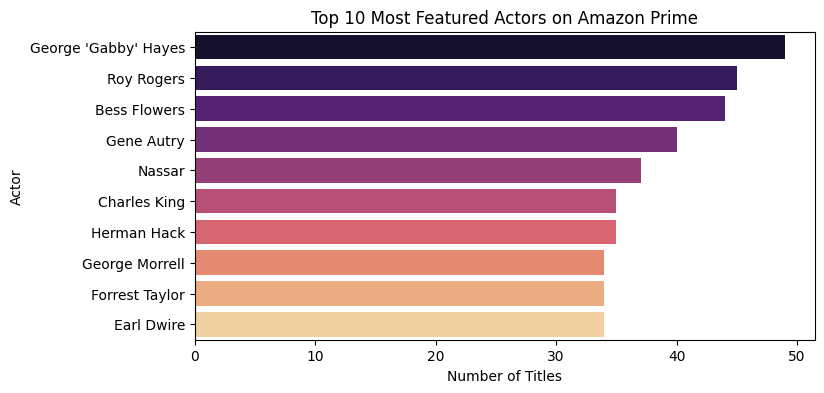

In [27]:
# Filter the credits dataset for actors only
actors_df = credits_df[credits_df['role'] == 'ACTOR']

# Count the occurrences of each actor
top_actors = actors_df['name'].value_counts().head(10)

# Create a bar plot
plt.figure(figsize=(8,4))
sb.barplot(x=top_actors.values, y=top_actors.index, palette='magma', hue=top_actors.index, legend=False)
plt.title("Top 10 Most Featured Actors on Amazon Prime")
plt.xlabel("Number of Titles")
plt.ylabel("Actor")
plt.show()

#### Observation

The horizontal bar chart shows the top 10 actors with the highest number of appeareances in content available on Amazon prime.

1.	**George ‘Gabby’ Hayes is the most featured actor with nearly 50 titles**, indicating a significant presence on the platform.
2.	**Roy Rogers and Bess Flowers** follow closely, each featured in **more than 40 titles.**
3.	The top 10 list includes **classic film actors**, many of whom were prominent in Westerns or early American cinema (e.g., Gene Autry, Charles King).
4.	This reinforces the earlier trend observed with directors — **Amazon Prime hosts a substantial amount of vintage/classic content.**
5.	There is a gradual decline in the number of titles from the top actor to the 10th (Earl Dwire), who still appears in over 30 titles.

### 9 - Most Popular Production Countries

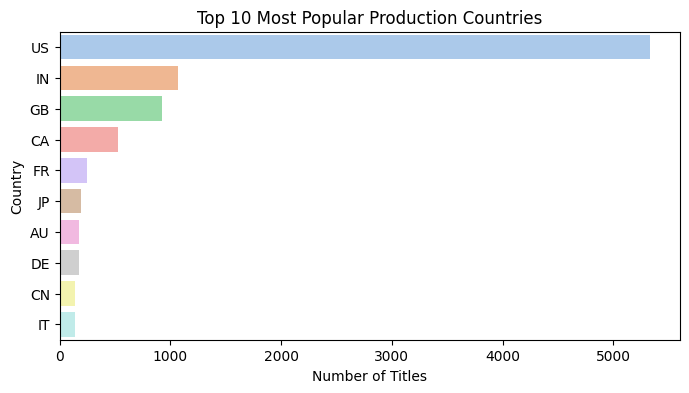

In [28]:
import ast

# Drop missing values
titles_df_clean = titles_df.dropna(subset=['production_countries'])

# Convert country strings to proper lists and flatten them
titles_df_clean['production_countries'] = titles_df_clean['production_countries'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
all_countries = titles_df_clean['production_countries'].explode()

# Remove empty lists
all_countries = all_countries.dropna()
all_countries = all_countries[all_countries != '']

# Count top 10 most frequent production countries
country_counts = all_countries.value_counts().head(10)

# Plot the fixed chart
plt.figure(figsize=(8,4))
sb.barplot(x=country_counts.values, y=country_counts.index, palette='pastel',  hue=country_counts.index, legend=False)
plt.title("Top 10 Most Popular Production Countries")
plt.xlabel("Number of Titles")
plt.ylabel("Country")
plt.show()

#### Observation

A bar chart effectively visualizes which **countries produce the most content** for Amazon Prime. This helps analyze regional dominance in content production.

1.	**United States (US) dominates** content production with over **4500 titles,** making it the primary contributor to Amazon Prime’s library.

2.	**India (IN) is the second-largest producer**, reflecting the strong presence and demand for Indian content on the platform.

3. **Amazon Prime’s catalog is heavily skewed towards Western** (especially American) productions, but it also includes **significant content from Asia, especially India.**
  
4. The presence of countries like Japan, China, and South Korea hints at **growing popularity of anime and Asian dramas** on the platform.

5. India’s strong ranking aligns with Amazon’s strategic focus on expanding its market in South Asia.

### 10 - Factors Affecting Audience Interest

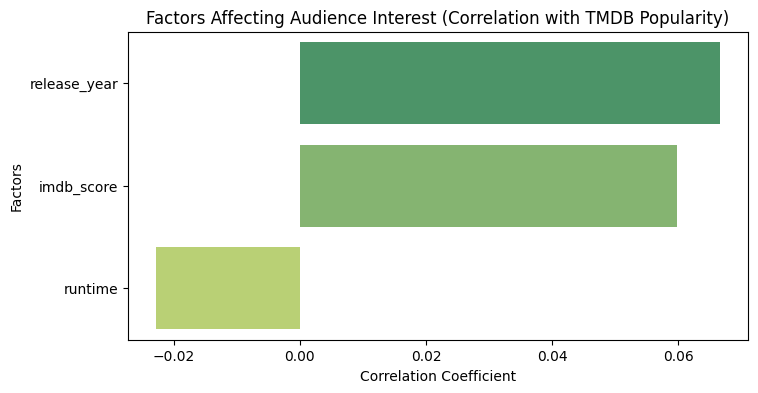

In [29]:
plt.figure(figsize=(8,4))

# Selecting numerical features affecting audience interest
features = ['imdb_score', 'tmdb_popularity', 'runtime', 'release_year']

# Calculating correlation with TMDB popularity (proxy for audience interest)
correlation = titles_df[features].corr()['tmdb_popularity'].drop('tmdb_popularity')

# Sorting values for better visualization
correlation_sorted = correlation.sort_values(ascending=False)
sb.barplot(x=correlation_sorted.values, y=correlation_sorted.index, palette='summer', hue=correlation_sorted.index, legend=False)
plt.title("Factors Affecting Audience Interest (Correlation with TMDB Popularity)")
plt.xlabel("Correlation Coefficient")
plt.ylabel("Factors")
plt.show()

#### Observation

This chart illustrates how various factors correlate with TMDB Popularity (a proxy for audience interest) for Amazon Prime content.

 Variables Considered:
   * release_year
   * imdb_score
   * runtime

Correlation Insights:

* **release_year**  -  0.06 (positive)  -  Newer content is **slightly more popular**, indicating audience preference for recent titles.
* **imdb_score**  -  0.05 (positive)  -  Higher IMDb scores have a **modest positive link** with popularity. Quality matters, but not heavily.
* **runtime**  -  -0.01* (negative)  -  Runtime has a **negligible or slightly negative correlation**—longer movies may not be preferred.

* Release year is the most influential factor among the three, though the overall correlations are weak.
* No strong predictor of popularity is evident, implying that other features like genre, actor popularity, marketing, or platform visibility might play a bigger role in driving views.

### 11 - IMDb Score Distribution by Content Type

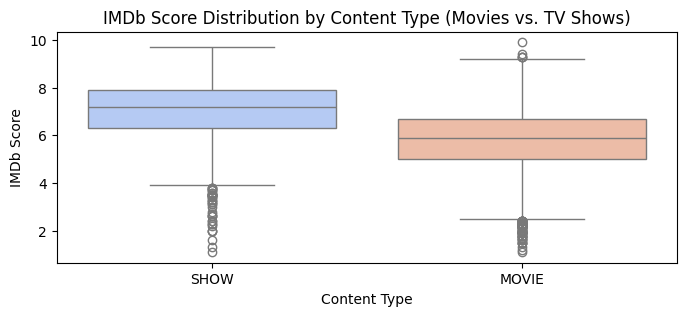

In [30]:
plt.figure(figsize=(8,3))

# Using the correct column name for content type
sb.boxplot(data=titles_df, x='type', y='imdb_score', palette='coolwarm', hue='type', legend=False)
plt.title("IMDb Score Distribution by Content Type (Movies vs. TV Shows)")
plt.xlabel("Content Type")
plt.ylabel("IMDb Score")
plt.show()

#### Observation

**1.	Median IMDb Score:**
  * TV Shows have a slightly higher median IMDb score than movies.
    
**2.	Score Range:**
   * Movies show a wider range of scores — they vary from low (≈2) to high (≈9.5+).
   * TV Shows are more tightly clustered, generally ranging between 5 and 9.
    
**3.	Outliers:**
   * Both types have outliers, but they are more prominent in movies, especially on the lower end.
    
**4.	Box Width (IQR - Interquartile Range):**
   * Movies have a broader IQR, indicating more variability in quality (as per IMDb).
   * TV Shows are more consistent in their IMDb ratings.

* TV Shows on Amazon Prime tend to be more consistent and slightly higher rated on average compared to movies.
* Movies show greater variation — some are highly rated, but a significant number have lower ratings.

### 12 - TMDB Popularity vs. IMDb Score

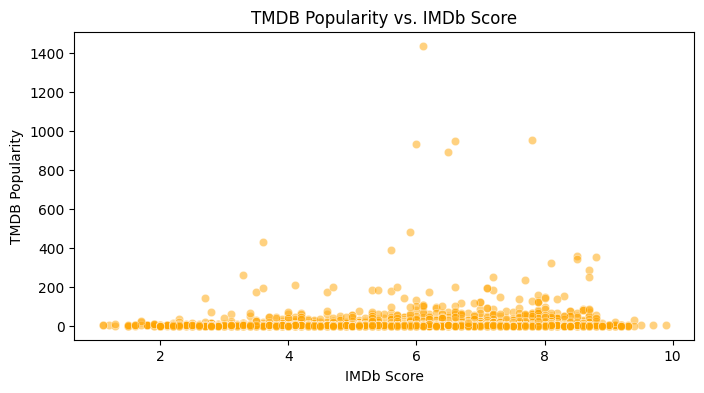

In [31]:
plt.figure(figsize=(8,4))

# Scatter plot to compare IMDb scores and TMDB popularity
sb.scatterplot(data=titles_df, x='imdb_score', y='tmdb_popularity', alpha=0.5, color='orange')

plt.title("TMDB Popularity vs. IMDb Score")
plt.xlabel("IMDb Score")
plt.ylabel("TMDB Popularity")
plt.show()

#### Observation

The above scatter plot shows that:
**1. Weak or No Clear Correlation**
* The points are **widely scattered**, showing **no strong linear relationship** between IMDb score and TMDB popularity.
* Content with **low IMDb scores (even < 4)** can still have **high TMDB popularity**, and vice versa.

**2. High Popularity is Sparse**
* A **few titles spike in popularity (TMDB > 1000)**, but these occur across a wide range of IMDb scores (from ~4 to ~8).
* Most titles are clustered **below TMDB popularity of 200.**

**3. IMDb Scores Cluster**
* IMDb scores mainly **cluster between 5 and 8**, which is common for many streaming titles.

* **Popularity on TMDB doesn’t depend heavily on IMDb ratings.**
* Other factors like actor fame, release timing, genre trends, or promotions may influence popularity more than rating alone.

### 13 - Pair plot

<Figure size 200x200 with 0 Axes>

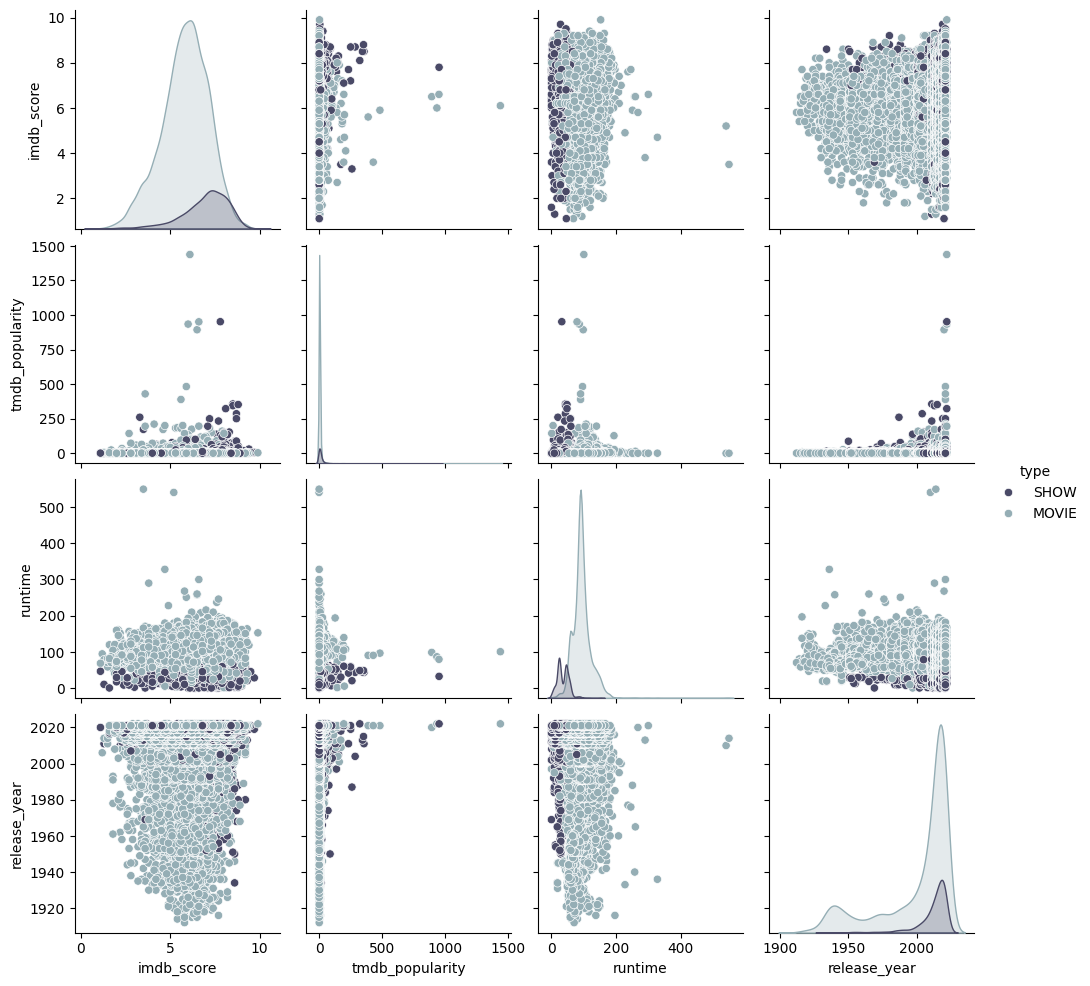

In [33]:
# Selecting numerical features for pair plot
selected_features = ['imdb_score', 'tmdb_popularity', 'runtime', 'release_year']

# Creating the pair plot
plt.figure(figsize=(2,2))
sb.pairplot(titles_df[selected_features + ['type']], hue='type', diag_kind='kde', palette='bone')
plt.show()

#### Observation

**1. Purpose of the Pair Plot**
A pair plot provides a detailed visualization of relationships between multiple numerical variables. In this context, it explores:
IMDb Score
TMDB Popularity
Runtime
Release Year

This visualization helps in identifying trends, clusters, correlations, and potential outliers across different variables, offering a deeper understanding of content performance on Amazon Prime.

**2. Key Insights from the Chart**

**A .  Linear Relationships**

* **IMDb Score vs. TMDB Popularity:**
    * If a positive linear trend is visible, it suggests that higher-rated content tends to be more popular among viewers.
    * A scattered pattern with no trend indicates that popularity isn't strongly tied to user ratings, possibly due to marketing influence or recent releases.

* **Runtime vs. IMDb Score:**
   * If no clear pattern is found, it implies that longer runtime does not guarantee higher IMDb ratings.
   * This can help Amazon avoid overinvesting in longer content with little payoff in viewer satisfaction.

**B.  Clusters and Outliers**

* **Clusters:**
    * Visible groupings may reflect different content types (e.g., movies vs shows) or genre-based patterns.
    * This can guide content curation and targeted marketing strategies.

* **Outliers:**
    * Example: Extremely long content with low ratings might indicate poor pacing or storytelling, calling for a review of such titles.
    * On the flip side, short content with high ratings may point to a preference for concise, impactful storytelling.

**C.  Temporal Trends (Release Year Analysis)**

* **Recent Releases vs. IMDb Scores:**
    * A downward trend in recent releases' scores may suggest declining content quality or stricter viewer expectations.
    * This can prompt Amazon to review its recent content strategy.

* **Older Content with High Ratings:**
    * If older titles consistently receive high ratings, Amazon could re-promote classic or evergreen content to capitalize on nostalgia and proven quality.

In overall conclusion : This pair plot serves as a powerful exploratory tool, revealing valuable relationships and trends across core performance metrics. These insights can help Amazon Prime optimize its content library, enhance viewer engagement, and make more data-driven production or acquisition decisions.



## **5. Solution to Business Objective**

**Business Objective**
Improve user engagement and content strategy on Amazon Prime Video by understanding what factors influence audience interest and content success (measured by IMDb Score and TMDB Popularity).

**Solution to the Business Objective**

**1. Optimize Content Acquisition and Production**

* Insight: High IMDb scores and TMDB popularity are weakly correlated, indicating popularity does not always reflect content quality.
* Action:
     * Invest in quality-driven productions (high IMDb scores) and pair them with strong marketing campaigns to boost popularity.
     * Prioritize acquisition of titles with proven audience engagement metrics, not just critically acclaimed ones.

**2. Enhance Recommendation Algorithms**

* Insight : Viewer interest is affected by features like release year, runtime, and content type (movie vs show).
* Action:
     * Use insights from correlation and pair plots to improve personalization models by weighting features like recent releases and content type preferences.
     * Cluster similar successful content for binge-watch suggestions or featured carousels.

**3. Improve User Retention with Balanced Content Strategy**

* Insight :
     * TV shows tend to have slightly higher IMDb ratings than movies.
     * Older content often retains high ratings.
* Action:
     * Promote classic content to nostalgic users, possibly in themed collections.
     * Create or license high-quality TV shows to improve long-term user retention.

**4. Monitor and Improve Content Performance**

* Insight : Outliers with high popularity but low IMDb scores may suggest discrepancy between hype and satisfaction.
* Action:
     * Use this to track underperforming popular titles, collect feedback, and optimize marketing messaging or improve future content in that genre.
     * Develop a content review framework that flags titles with low user satisfaction despite high views.

**5. Data-Driven Budget Allocation**

* Insight : No strong relation between runtime and audience engagement.
* Action:
     * Avoid allocating large budgets to longer content by default.
     * Focus on tight storytelling and mid-length content, especially in genres where runtime does not affect ratings.



# **Conclusion**

* This project performed an extensive Exploratory Data Analysis (EDA) on Amazon Prime Video content with a focus on understanding patterns in viewer ratings, popularity, runtime, and release trends. The goal was to extract actionable insights that can help optimize content strategy, improve viewer engagement, and support data-driven decision-making.


* EDA has revealed that content success on Amazon Prime is multi-dimensional, influenced by a blend of quality, timing, type, and marketing. Popularity alone is not a sufficient metric of performance — platforms should consider both user satisfaction (ratings) and engagement (popularity) when evaluating and curating content.

This analysis empowers Amazon Prime (or any streaming platform) to:

   * Make **smarter content investments**
   * **Optimize recommendations** based on user behavior
   * **Improve content quality and marketing alignment**
   * Re-engage users through **data-backed promotions**.